In [23]:
import pandas as pd

df = pd.read_excel("trying/kategori.xlsx")
df.head()


,sentiment,kategori,review
0,negatif,transportasi,ada biaya layanan otomatis biaya asuransi otom...
1,negatif,refund dan pembayaran,traveloka sekarang jadi aneh tibatiba saja lim...
2,negatif,pengalaman pengguna dan aplikasi,traveloka tidak seperti dulu sekarang memuat u...
3,negatif,hotel dan penginapan,booking hotel saat mau check in pihak resepsio...
4,negatif,refund dan pembayaran,jangan pernah pesan apapun di traveloka karena...


In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder_kategori = LabelEncoder()
label_encoder_sentimen = LabelEncoder()

df['kategori'] = label_encoder_kategori.fit_transform(df['kategori'])
df['sentiment'] = label_encoder_sentimen.fit_transform(df['sentiment'])

df.head()


,sentiment,kategori,review
0,0,6,ada biaya layanan otomatis biaya asuransi otom...
1,0,5,traveloka sekarang jadi aneh tibatiba saja lim...
2,0,3,traveloka tidak seperti dulu sekarang memuat u...
3,0,0,booking hotel saat mau check in pihak resepsio...
4,0,5,jangan pernah pesan apapun di traveloka karena...


In [25]:
# Menghitung jumlah masing-masing label encoded
sentiment_counts_encoded = df['sentiment'].value_counts().sort_index()

# Mengembalikan label aslinya menggunakan inverse_transform
sentiment_labels = label_encoder_sentimen.inverse_transform(sentiment_counts_encoded.index)

# Membuat DataFrame hasilnya
sentiment_counts = pd.DataFrame({
    'Sentimen': sentiment_labels,
    'Jumlah': sentiment_counts_encoded.values
})

print(sentiment_counts)


  Sentimen  Jumlah
0  negatif     433
1  positif     406


In [26]:
df['kategori_label'] = label_encoder_kategori.inverse_transform(df['kategori'])
df['sentiment_label'] = label_encoder_sentimen.inverse_transform(df['sentiment'])

pd.crosstab(df['kategori_label'], df['sentiment_label'])


sentiment_label,negatif,positif
kategori_label,,
hotel dan penginapan,66,51
lainnya,10,6
layanan dan customer service,59,82
pengalaman pengguna dan aplikasi,90,73
promo dan diskon,63,62
refund dan pembayaran,81,65
transportasi,64,67


In [27]:
import os
import pickle

# # Pastikan folder tujuan ada, kalau belum ada maka buat dulu
# os.makedirs('trying', exist_ok=True)

# Simpan LabelEncoder kategori
with open('trying/label_encoder_kategori.pkl', 'wb') as file:
    pickle.dump(label_encoder_kategori, file)

# Simpan LabelEncoder sentiment
with open('trying/label_encoder_sentimen.pkl', 'wb') as file:
    pickle.dump(label_encoder_sentimen, file)

print("LabelEncoder berhasil disimpan dalam folder")


LabelEncoder berhasil disimpan dalam folder


In [28]:
# Load LabelEncoder dari file
with open('trying/label_encoder_kategori.pkl', 'rb') as file:
    label_encoder_kategori = pickle.load(file)

with open('trying/label_encoder_sentimen.pkl', 'rb') as file:
    label_encoder_sentimen = pickle.load(file)

# Tampilkan mapping dalam LabelEncoder
print("Mapping Sentiment:")
for idx, label in enumerate(label_encoder_sentimen.classes_):
    print(f"{idx}: {label}")

print("\nMapping Kategori:")
for idx, label in enumerate(label_encoder_kategori.classes_):
    print(f"{idx}: {label}")


Mapping Sentiment:
0: negatif
1: positif

Mapping Kategori:
0: hotel dan penginapan
1: lainnya
2: layanan dan customer service
3: pengalaman pengguna dan aplikasi
4: promo dan diskon
5: refund dan pembayaran
6: transportasi


###### Split Data

In [29]:
from sklearn.model_selection import train_test_split

X = df['review'].values
y = df[['sentiment', 'kategori']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek hasil split
print("Fitur Latih (X_train):", X_train.shape)
print("Fitur Uji (X_test):", X_test.shape)
print("Target Latih (y_train):", y_train.shape)
print("Target Uji (y_test):", y_test.shape)

# Simpan data
train_data = pd.DataFrame({'review': X_train, 'sentiment': y_train[:, 0], 'kategori': y_train[:, 1]})
train_data.to_excel('trying/train_data.xlsx', index=False)

test_data = pd.DataFrame({'review': X_test, 'sentiment': y_test[:, 0], 'kategori': y_test[:, 1]})
test_data.to_excel('trying/test_data.xlsx', index=False)

Fitur Latih (X_train): (671,)
Fitur Uji (X_test): (168,)
Target Latih (y_train): (671, 2)
Target Uji (y_test): (168, 2)


###### Model

Loading data...
Loading FastText model...
FastText model loaded successfully!
Epoch 1/50


c:\Users\ratri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.5087 - loss: 0.6881
Epoch 1: val_accuracy improved from -inf to 0.67857, saving model to best_bilstm_model.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 22s 510ms/step - accuracy: 0.5111 - loss: 0.6875 - val_accuracy: 0.6786 - val_loss: 0.6208
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.7066 - loss: 0.5886
Epoch 2: val_accuracy improved from 0.67857 to 0.75595, saving model to best_bilstm_model.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 547ms/step - accuracy: 0.7082 - loss: 0.5878 - val_accuracy: 0.7560 - val_loss: 0.5026
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.8240 - loss: 0.4324
Epoch 3: val_accuracy improved from 0.75595 to 0.80357, saving model to best_bilstm_model.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 687ms/step - accuracy: 0.8263 - loss: 0.4289 - val_accuracy: 0.8036 - val_loss: 0.5210
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 0.9452 - loss: 0.1829
Epoch 4: val_accuracy improved from 0.80357 to 0.88690, saving model to best_bilstm_model.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 609ms/step - accuracy: 0.9453 - loss: 0.1832 - val_accuracy: 0.8869 - val_loss: 0.3524
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.9652 - loss: 0.1283
Epoch 5: val_accuracy did not improve from 0.88690
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 587ms/step - accuracy: 0.9655 - loss: 0.1270 - val_accuracy: 0.8810 - val_loss: 0.3376
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.9815 - loss: 0.0563
Epoch 6: val_accuracy improved from 0.88690 to 0.92857, saving model to best_bilstm_model.h5


21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 600ms/step - accuracy: 0.9817 - loss: 0.0557 - val_accuracy: 0.9286 - val_loss: 0.3072
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 586ms/step - accuracy: 0.9924 - loss: 0.0621
Epoch 7: val_accuracy did not improve from 0.92857
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 612ms/step - accuracy: 0.9924 - loss: 0.0608 - val_accuracy: 0.8929 - val_loss: 0.5074
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - accuracy: 0.9726 - loss: 0.0859
Epoch 8: val_accuracy did not improve from 0.92857
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 654ms/step - accuracy: 0.9730 - loss: 0.0851 - val_accuracy: 0.9167 - val_loss: 0.3241
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.9989 - loss: 0.0180
Epoch 9: val_accuracy did not improve from 0.92857
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 512ms/step - accuracy: 0.9989 - loss: 0.0179 - val_accuracy: 0.8690 - val_loss: 0.4167
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.9972 - loss: 0.0119
Epoch 10: val_accuracy improve

21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 510ms/step - accuracy: 0.9972 - loss: 0.0119 - val_accuracy: 0.9345 - val_loss: 0.3451
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.9995 - loss: 0.0040
Epoch 11: val_accuracy did not improve from 0.93452
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 515ms/step - accuracy: 0.9995 - loss: 0.0041 - val_accuracy: 0.8869 - val_loss: 0.6379
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.9986 - loss: 0.0070
Epoch 12: val_accuracy did not improve from 0.93452
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 514ms/step - accuracy: 0.9985 - loss: 0.0075 - val_accuracy: 0.8988 - val_loss: 0.6660
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step - accuracy: 0.9820 - loss: 0.0767
Epoch 13: val_accuracy did not improve from 0.93452
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 514ms/step - accuracy: 0.9823 - loss: 0.0755 - val_accuracy: 0.9107 - val_loss: 0.3083
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - accuracy: 0.9946 - loss: 0.0184
Epoch 14: val_accuracy d

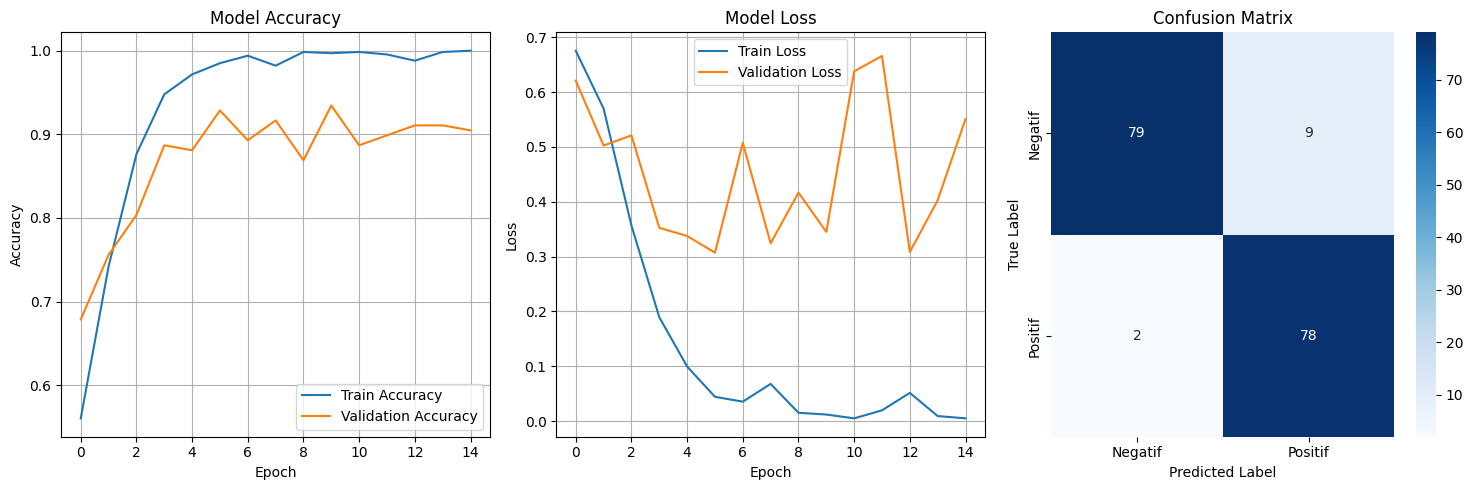

Saving model and tokenizer...
Training completed successfully!
Model saved as: bilstm_sentiment_model.h5
Tokenizer saved as: tokenizer.pickle
Config saved as: model_config.pickle


In [30]:
## Model Bi-LSTM

import pandas as pd
import numpy as np
import re
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import gensim.downloader as api
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pickle

# 1. Load data training dan testing
print("Loading data...")
train_data = pd.read_excel('trying/train_data.xlsx')
test_data = pd.read_excel('trying/test_data.xlsx')

# 2. Preprocessing teks
def preprocess_text(text):
    """Preprocessing teks untuk membersihkan data"""
    if pd.isna(text):
        return ""
    text = str(text).lower() #lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) #remove url
    text = re.sub(r'\S+@\S+', '', text) #remove email
    text = re.sub(r'[^a-zA-Z\s]', ' ', text) #remove special characters
    text = re.sub(r'\s+', ' ', text) #remove extra whitespaces
    text = text.strip() #remove leading/trailing whitespaces
    return text

train_data['review_clean'] = train_data['review'].apply(preprocess_text)
test_data['review_clean'] = test_data['review'].apply(preprocess_text)

# Remove empty reviews
train_data = train_data[train_data['review_clean'].str.len() > 0]
test_data = test_data[test_data['review_clean'].str.len() > 0]

# 3. Tokenization dan Sequence Processing
all_texts = list(train_data['review_clean']) + list(test_data['review_clean']) #Buat vocab

# Set parameter untuk tokenizer
MAX_VOCAB_SIZE = 20000
MAX_SEQUENCE_LENGTH = 100
OOV_TOKEN = "<OOV>"

# Buat tokenizer
tokenizer = Tokenizer(
    num_words=MAX_VOCAB_SIZE,
    oov_token=OOV_TOKEN,
    lower=True
)
tokenizer.fit_on_texts(all_texts)

# Convert text ke sequences
X_train_seq = tokenizer.texts_to_sequences(train_data['review_clean'])
X_test_seq = tokenizer.texts_to_sequences(test_data['review_clean'])

# Padding sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# 4. Load FastText Pre-trained Model
print("Loading FastText model...")
try:
    # Download FastText 
    fasttext_model = api.load('fasttext-wiki-news-subwords-300')
    EMBEDDING_DIM = 300
    print("FastText model loaded successfully!")
except Exception as e:
    print(f"Error loading FastText: {e}")
    print("Using random embedding instead...")
    fasttext_model = None
    EMBEDDING_DIM = 100

# 5. Create Embedding Matrix
word_index = tokenizer.word_index
vocab_size = min(len(word_index) + 1, MAX_VOCAB_SIZE)

# Initialize 
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

if fasttext_model is not None:
    # embedding matrix with FastText vectors
    found_words = 0
    for word, idx in word_index.items():
        if idx >= MAX_VOCAB_SIZE:
            continue
        try:
            embedding_vector = fasttext_model[word]
            embedding_matrix[idx] = embedding_vector
            found_words += 1
        except KeyError:
            pass
else:
    # Random initialization jika fastext tidak berhasil diunduh
    embedding_matrix = np.random.uniform(-0.25, 0.25, (vocab_size, EMBEDDING_DIM))

# 6. Prepare labels
y_train = train_data['sentiment'].values
y_test = test_data['sentiment'].values

# 7. Build Bi-LSTM model
model = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=EMBEDDING_DIM,
        weights=[embedding_matrix],
        input_length=MAX_SEQUENCE_LENGTH,
        trainable=True,  # Fine-tune embeddings
        name='embedding'
    ),
    
    # Spatial dropout untuk regularization
    SpatialDropout1D(0.2),
    
    # Bidirectional LSTM layers
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    
    # Output layer untuk binary classification
    Dense(1, activation='sigmoid') # Positif dan Negatif
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 8. Setup callbacks
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        'best_bilstm_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# 9. Train model
BATCH_SIZE = 32
EPOCHS = 50

history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

# 10. Evaluate model
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
target_names = ['Negatif', 'Positif']
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 11. Plot training history
plt.figure(figsize=(15, 5))

# Plot accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot confusion matrix
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# 12. Save model dan tokenizer
print("Saving model and tokenizer...")
model.save('bilstm_sentiment_model.h5')

# Save tokenizer
with open('tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

# Save model configuration
model_config = {
    'max_sequence_length': MAX_SEQUENCE_LENGTH,
    'vocab_size': vocab_size,
    'embedding_dim': EMBEDDING_DIM,
    'sentiment_mapping': {0: 'negatif', 1: 'positif'}
}

with open('model_config.pickle', 'wb') as f:
    pickle.dump(model_config, f, protocol=pickle.HIGHEST_PROTOCOL)

print("Training completed successfully!")
print(f"Model saved as: bilstm_sentiment_model.h5")
print(f"Tokenizer saved as: tokenizer.pickle")
print(f"Config saved as: model_config.pickle")

In [31]:
# ## Model LSTM

# import pandas as pd
# import numpy as np
# import re
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# import gensim.downloader as api
# import matplotlib.pyplot as plt
# import seaborn as sns
# from collections import Counter
# import pickle

# # 1. Load data training dan testing
# train_data = pd.read_excel('trying/train_data.xlsx')
# test_data = pd.read_excel('trying/test_data.xlsx')

# # 2. Preprocessing teks
# def preprocess_text(text):
#     """Preprocessing teks untuk membersihkan data"""
#     if pd.isna(text):
#         return ""
#     text = str(text).lower() #lowercase
#     text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) #remove url
#     text = re.sub(r'\S+@\S+', '', text) #remove email
#     text = re.sub(r'[^a-zA-Z\s]', ' ', text) #remove special characters
#     text = re.sub(r'\s+', ' ', text) #remove extra spaces
#     text = text.strip() #remove leading/trailing spaces
#     return text

# train_data['review_clean'] = train_data['review'].apply(preprocess_text)
# test_data['review_clean'] = test_data['review'].apply(preprocess_text)

# # Remove empty reviews
# train_data = train_data[train_data['review_clean'].str.len() > 0]
# test_data = test_data[test_data['review_clean'].str.len() > 0]

# # 3. Tokenization dan Sequence Processing
# all_texts = list(train_data['review_clean']) + list(test_data['review_clean']) #Buat vocab

# # Set parameter untuk tokenizer
# MAX_VOCAB_SIZE = 20000
# MAX_SEQUENCE_LENGTH = 100
# OOV_TOKEN = "<OOV>"

# # Buat tokenizer
# tokenizer = Tokenizer(
#     num_words=MAX_VOCAB_SIZE,
#     oov_token=OOV_TOKEN,
#     lower=True
# )

# tokenizer.fit_on_texts(all_texts)

# # Convert text ke sequences
# X_train_seq = tokenizer.texts_to_sequences(train_data['review_clean'])
# X_test_seq = tokenizer.texts_to_sequences(test_data['review_clean'])

# # Padding sequences
# X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
# X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# # 4. Load FastText Pre-trained Model
# try:
#     # Download FastText model (ini akan memakan waktu jika pertama kali)
#     fasttext_model = api.load('fasttext-wiki-news-subwords-300')
#     EMBEDDING_DIM = 300
#     print("FastText model loaded successfully!")
# except Exception as e:
#     print(f"Error loading FastText: {e}")
#     print("Using random embedding instead...")
#     fasttext_model = None
#     EMBEDDING_DIM = 100

# # 5. Create Embedding Matrix
# word_index = tokenizer.word_index
# vocab_size = min(len(word_index) + 1, MAX_VOCAB_SIZE)

# # Initialize embedding matrix
# embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

# if fasttext_model is not None:
#     # Fill embedding matrix with FastText vectors
#     found_words = 0
#     for word, idx in word_index.items():
#         if idx >= MAX_VOCAB_SIZE:
#             continue
#         try:
#             embedding_vector = fasttext_model[word]
#             embedding_matrix[idx] = embedding_vector
#             found_words += 1
#         except KeyError:
#             pass
    
# else:
#     # Random initialization jika fastext tidak berhasil diunduh
#     embedding_matrix = np.random.uniform(-0.25, 0.25, (vocab_size, EMBEDDING_DIM))

# # 6. Prepare labels
# y_train = train_data['sentiment'].values
# y_test = test_data['sentiment'].values

# # 7. Build LSTM model
# model = Sequential([
#     # Embedding layer dengan pre-trained weights
#     Embedding(
#         input_dim=vocab_size,
#         output_dim=EMBEDDING_DIM,
#         weights=[embedding_matrix],
#         input_length=MAX_SEQUENCE_LENGTH,
#         trainable=True,  # Fine-tune embeddings
#         name='embedding'
#     ),
    
#     # Spatial dropout untuk regularization
#     SpatialDropout1D(0.2),
    
#     # LSTM layers (tanpa Bidirectional)
#     LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3),
#     LSTM(64, dropout=0.3, recurrent_dropout=0.3),
#     Dense(64, activation='relu'),
#     Dropout(0.5),
#     Dense(32, activation='relu'),
#     Dropout(0.3),
    
#     # Output layer untuk binary classification
#     Dense(1, activation='sigmoid') #positive or negative
# ])

# # Compile model
# model.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

# # 8. Setup callbacks
# callbacks = [
#     EarlyStopping(
#         monitor='val_accuracy',
#         patience=5,
#         restore_best_weights=True,
#         verbose=1
#     ),
#     ModelCheckpoint(
#         'best_lstm_model.h5',
#         monitor='val_accuracy',
#         save_best_only=True,
#         verbose=1
#     )
# ]

# # 9. Train model
# BATCH_SIZE = 32
# EPOCHS = 50

# history = model.fit(
#     X_train_pad, y_train,
#     validation_data=(X_test_pad, y_test),
#     epochs=EPOCHS,
#     batch_size=BATCH_SIZE,
#     callbacks=callbacks,
#     verbose=1
# )

# # 10. Evaluate model
# y_pred_prob = model.predict(X_test_pad)
# y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# # Calculate metrics
# accuracy = accuracy_score(y_test, y_pred)
# print(f"\nTest Accuracy: {accuracy:.4f}")

# # Classification report
# print("\nClassification Report:")
# target_names = ['Negatif', 'Positif']
# print(classification_report(y_test, y_pred, target_names=target_names))

# # Confusion Matrix
# print("\nConfusion Matrix:")
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# # 11. Plot training history
# plt.figure(figsize=(15, 5))

# # Plot accuracy
# plt.subplot(1, 3, 1)
# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)

# # Plot loss
# plt.subplot(1, 3, 2)
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)

# # Plot confusion matrix
# plt.subplot(1, 3, 3)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=target_names, yticklabels=target_names)
# plt.title('Confusion Matrix')
# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')
# plt.tight_layout()
# plt.show()

# # 12. Save model dan tokenizer
# model.save('lstm_sentiment_model.h5')
# with open('lstm_tokenizer.pickle', 'wb') as f:
#     pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

# # Save model configuration
# model_config = {
#     'max_sequence_length': MAX_SEQUENCE_LENGTH,
#     'vocab_size': vocab_size,
#     'embedding_dim': EMBEDDING_DIM,
#     'sentiment_mapping': {0: 'negatif', 1: 'positif'},
#     'model_type': 'LSTM'
# }

# with open('lstm_model_config.pickle', 'wb') as f:
#     pickle.dump(model_config, f, protocol=pickle.HIGHEST_PROTOCOL)

# print("Training completed successfully!")
# print(f"Model saved as: lstm_sentiment_model.h5")
# print(f"Tokenizer saved as: lstm_tokenizer.pickle")
# print(f"Config saved as: lstm_model_config.pickle")

In [32]:
## Model Logistic Regression

import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Load data 
train_df = pd.read_excel('trying/train_data.xlsx')
test_df = pd.read_excel('trying/test_data.xlsx')

# Preprocessing
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # hapus karakter non-huruf
    text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi berlebih
    return text

train_df['cleaned_review'] = train_df['review'].apply(clean_text)
test_df['cleaned_review'] = test_df['review'].apply(clean_text)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_df['cleaned_review'])
X_test_tfidf = vectorizer.transform(test_df['cleaned_review'])

# Target (label kategori)
y_train = train_df['kategori']
y_test = test_df['kategori']

# Training Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Evaluasi
y_pred = model.predict(X_test_tfidf)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Simpan model dan vectorizer
with open('logreg_kategori.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


Akurasi: 0.39285714285714285
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.21      0.34        33
           1       0.00      0.00      0.00         3
           2       0.21      0.17      0.19        29
           3       0.16      0.43      0.23        21
           4       0.80      0.62      0.70        26
           5       0.47      0.48      0.48        33
           6       0.54      0.57      0.55        23

    accuracy                           0.39       168
   macro avg       0.44      0.35      0.35       168
weighted avg       0.52      0.39      0.41       168



c:\Users\ratri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ratri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ratri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [33]:
# ## Model SVM

# import pandas as pd
# import re
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC
# from sklearn.metrics import classification_report, accuracy_score
# import pickle

# # Load data
# train_df = pd.read_excel('trying/train_data.xlsx')
# test_df = pd.read_excel('trying/test_data.xlsx')

# # Preprocessing
# def clean_text(text):
#     text = text.lower()  # lowercase
#     text = re.sub(r'[^a-zA-Z\s]', '', text)  # hapus karakter non-huruf
#     text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi berlebih
#     return text

# train_df['cleaned_review'] = train_df['review'].apply(clean_text)
# test_df['cleaned_review'] = test_df['review'].apply(clean_text)

# # TF-IDF vectorization
# vectorizer = TfidfVectorizer(max_features=5000)
# X_train_tfidf = vectorizer.fit_transform(train_df['cleaned_review'])
# X_test_tfidf = vectorizer.transform(test_df['cleaned_review'])

# # Target (label kategori)
# y_train = train_df['kategori']
# y_test = test_df['kategori']

# # Training SVM
# svm_model = LinearSVC()
# svm_model.fit(X_train_tfidf, y_train)

# # Evaluasi
# y_pred = svm_model.predict(X_test_tfidf)
# print("Akurasi:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

# # Simpan model dan vectorizer
# with open('svm_kategori.pkl', 'wb') as f:
#     pickle.dump(svm_model, f)

# with open('tfidf_vectorizer.pkl', 'wb') as f:
#     pickle.dump(vectorizer, f)



In [34]:
# ## Model Naive Bayes

# import pandas as pd
# import re
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import classification_report, accuracy_score
# import pickle

# # Load data
# train_df = pd.read_excel('trying/train_data.xlsx')
# test_df = pd.read_excel('trying/test_data.xlsx')

# # Preprocessing
# def clean_text(text):
#     text = text.lower()
#     text = re.sub(r'[^a-zA-Z\s]', '', text)
#     text = re.sub(r'\s+', ' ', text).strip()
#     return text

# train_df['cleaned_review'] = train_df['review'].apply(clean_text)
# test_df['cleaned_review'] = test_df['review'].apply(clean_text)

# # TF-IDF vectorization
# vectorizer = TfidfVectorizer(max_features=5000)
# X_train_tfidf = vectorizer.fit_transform(train_df['cleaned_review'])
# X_test_tfidf = vectorizer.transform(test_df['cleaned_review'])

# # Target (label kategori)
# y_train = train_df['kategori']
# y_test = test_df['kategori']

# # Training Naive Bayes
# model = MultinomialNB()
# model.fit(X_train_tfidf, y_train)

# # Evaluasi
# y_pred = model.predict(X_test_tfidf)
# print("Akurasi:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))

# # Simpan model dan vectorizer
# with open('nb_kategori.pkl', 'wb') as f:
#     pickle.dump(model, f)

# with open('tfidf_vectorizer.pkl', 'wb') as f:
#     pickle.dump(vectorizer, f)


###### Predict 

In [35]:
# import pickle
# import re
# import numpy as np
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Load LSTM model untuk prediksi sentimen
# lstm_model = load_model('lstm_sentiment_model.h5')
# with open('lstm_tokenizer.pickle', 'rb') as f:
#     tokenizer = pickle.load(f)
# with open('lstm_model_config.pickle', 'rb') as f:
#     config = pickle.load(f)

# # Load model kategori: Naive Bayes
# with open('nb_kategori.pkl', 'rb') as f:
#     kategori_model = pickle.load(f)

# # Load TF-IDF dan LabelEncoder
# with open('tfidf_vectorizer.pkl', 'rb') as f:
#     tfidf = pickle.load(f)
# with open('trying/label_encoder_kategori.pkl', 'rb') as f:
#     label_encoder_kategori = pickle.load(f)

# # Preprocessing
# def preprocess(text):
#     text = text.lower()
#     text = re.sub(r'[^a-zA-Z\s]', '', text)
#     return re.sub(r'\s+', ' ', text).strip()

# # Analisis ulasan
# def analyze_review(text):
#     cleaned = preprocess(text)

#     # Prediksi sentimen (LSTM)
#     seq = tokenizer.texts_to_sequences([cleaned])
#     pad = pad_sequences(seq, maxlen=config['max_sequence_length'], padding='post')
#     prob = lstm_model.predict(pad)[0][0]
#     sentimen = 'positif' if prob > 0.5 else 'negatif'
#     conf = prob if prob > 0.5 else 1 - prob

#     # Prediksi kategori (Naive Bayes)
#     tfidf_input = tfidf.transform([cleaned])
#     kategori_label = kategori_model.predict(tfidf_input)[0]
#     kategori = label_encoder_kategori.inverse_transform([kategori_label])[0]

#     return {
#         'ulasan': text,
#         'sentimen': sentimen,
#         'confidence': round(conf, 3),
#         'kategori': kategori
#     }

# # Contoh penggunaan
# review = "Pelayanan sangat lambat dan CS tidak membantu sama sekali"
# hasil = analyze_review(review)
# print("Ulasan:", hasil['ulasan'])
# print("Sentimen:", hasil['sentimen'], f"(Confidence: {hasil['confidence']})")
# print("Kategori:", hasil['kategori'])
